In [226]:
#importamos la librerias
import pandas as pd
from IPython.display import display
import numpy as np
from statsmodels.formula.api import ols
import json
from urllib.request import urlopen

import seaborn as sns
import matplotlib.pyplot as plt



# Gestion de librerias
# ==============================================================================
from importlib import reload
import folium
import warnings

# Matemáticas y estadísticas
# ==============================================================================
import math

# Preparación de datos
# ==============================================================================
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

#Sentencia para mostrar todas las variables al imprimir un data frame.
pd.options.display.max_columns = None


<frozen importlib._bootstrap>:914: ImportWarning: _PyDrive2ImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _GenerativeAIImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _OpenCVImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: APICoreClientInfoImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: _AltairImportHook.find_spec() not found; falling back to find_module()


In [227]:
#Gráficas
# Función para graficar atributos en barras, pair plot o box-plot
def multiple_plot(ncols, data, columns, target_var, plot_type, title, rot):
    '''
    Returns the figure build from input parameters.

        Parameters:
            ncols       [integer]    Number of columns for subplots.
            data        [dataframe]  Features dataframe.
            columns     [list]       List of names of featutes in dataframe to plot.
            target_var  [string]     Name of column of target variable or feature.
            plot_type   [string]     Name of graphic. [countplot, boxplt or scatterplot]
            title       [string]     Title for figure
            rot         [integer]    Rotation angle for x axis labels
        Returns:
            Plot of figure

    Ejemplos:
        multiple_plot(1, d , None, 'bad_credit', 'countplot', 'Frecuencia de instancias para la variable bad_credit',0)
        multiple_plot(1, d , 'purpose', 'age_yrs', 'boxplot', 'Distribución de la variable próposito vs la edad',90)
        multiple_plot(1, d , numCols, None, 'scatterplot', 'Relación entre las variables numéricas',30)
        multiple_plot(3, d , catCols, None, 'countplot', 'Frecuencia de instancias para variables categóricas',30)
        multiple_plot(3, d , catCols, 'age_yrs', 'boxplot', 'Distribución de la variables categóticas vs. la edad',30)
    '''


    # Paletas de colores y colores de las gráficas
    paletas = ['nipy_spectral','hsv','jet_r','Paired','Set2','Dark2','tab10','husl','mako']
    color = ['steelblue','forestgreen', 'amber']


    # Parámetros iniciales
    title_dist = 1.1  # Ajusta la distancia vertical del título en el gráfico
    x = -1            # Ubicación en el eje x del gráfico
    y =  0            # Ubicación en el eje y del gráfico
    nrows = 1         # Número inicial de filas


    # Ajustar el número de filas según el tipo de gráfico y la cantidad de columnas
    if isinstance(columns, list):
        nrows = math.ceil(len(columns) / ncols)

    # Crear el gráfico según el tipo especificado
    if ((nrows <= 1 and ncols <= 1) or plot_type == 'scatterplot'):

        # Countplot
        if plot_type == 'countplot':
            # Configurar el gráfico countplot
            fig, axes = plt.subplots(1, 1, figsize=(6, 4))
            ax_cond = axes
            sns.countplot(data=data,
                          x=target_var,
                          ax=axes,
                          palette=paletas[0],
                          zorder=1,
                          order=data[target_var].value_counts().index,
                          alpha=0.8
                          )
            # Personalizar el eje x
            ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
            # Configurar título
            ax_cond.set_title(title, fontsize=14, fontweight="bold", y=title_dist)

        # Boxplot
        elif plot_type == 'boxplot':
            # Configurar el gráfico boxplot
            fig, axes = plt.subplots(1, 1, figsize=(6, 4))
            ax_cond = axes
            sns.boxplot(data=data,
                        x=columns,
                        y=target_var,
                        ax=axes,
                        palette=paletas[0],
                        zorder=1
                        )
            # Personalizar el eje x
            ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
            # Configurar título
            ax_cond.set_title(title, fontsize=14, fontweight="bold", y=title_dist)


        # Scatterplot Matrix (Pairplot)
        elif plot_type == 'scatterplot':
            # Configurar el gráfico pairplot
            plot = sns.pairplot(data[columns],
                                palette=paletas[0],
                                diag_kws={'color': color[1]},
                                plot_kws={'color': color[0]},
                                diag_kind='kde'
                                )
            # Ajustar el tamaño del gráfico
            plot.fig.set_size_inches(12, 12)
            # Añadir un título al pairplot
            plot.fig.suptitle(title, fontsize=14, fontweight="bold")
            # Ajustar el diseño para evitar solapamientos
            plt.subplots_adjust(top=0.9)
            # Mostrar el gráfico
            plt.show()

    # Graficar más de un subplot
    else:
        # Crear subplots con el número especificado de filas y columnas
        fig, axes = plt.subplots(nrows, ncols, figsize=(15, (nrows * 3) + 1))

        for i, column in enumerate(columns):
            x = x + 1

            # Reiniciar x e incrementar y si x alcanza el número de columnas
            if x >= ncols:
                y = y + 1
                x = 0

            # Configurar el subplot actual
            if nrows == 1:
                ax_cond = axes[i]
                title_dist = 1.1
            else:
                ax_cond = axes[y, x]

            # Crear el gráfico según el tipo especificado
            if plot_type == 'countplot':
                # Countplot
                sns.countplot(data=data,
                              x=column,
                              ax=ax_cond,
                              palette=paletas[0],
                              zorder=1,
                              edgecolor='black',
                              linewidth=0.5,
                              order=data[column].value_counts().index
                              )

            elif plot_type == 'boxplot':
                # Boxplot
                sns.boxplot(data=data,
                            x=column,
                            y=target_var,
                            ax=ax_cond,
                            palette=paletas[0],
                            zorder=1
                            )

            # Añadir cuadrícula en el eje y
            ax_cond.grid(axis='y', zorder=0)
            # Personalizar el eje x
            ax_cond.set_xticklabels(ax_cond.get_xticklabels(), rotation=rot)
            # Configurar título del subplot
            ax_cond.set_title(column, fontsize=10)
            # Ajustar tamaño de las etiquetas
            ax_cond.tick_params(labelsize=8)
            # Limpiar etiquetas del eje x
            ax_cond.set_xlabel("")

        # Ajustar el diseño y el título general del conjunto de subplots
        fig.tight_layout()
        fig.suptitle(title, fontsize=14, fontweight="bold", y=title_dist - 0.15)
        plt.subplots_adjust(top=0.9)

        # Eliminar subplots sin datos si hay más de una fila
        if nrows > 1:
            for ax in axes.flat:
                if not bool(ax.has_data()):
                    fig.delaxes(ax)  # Eliminar si no hay datos en el subplot

In [228]:
#Cargar los datos desde una url que está en github

# links de las fuentes de información
link_dataset_csv   = 'https://raw.githubusercontent.com/juandiegovillaf/seminario_esp_acyd_udea/main/data/CHC_2019.csv'
link_metadata_json = "https://raw.githubusercontent.com/juandiegovillaf/seminario_esp_acyd_udea/main/data/metadata_habitantes_calle.json"

# se lee los datos csg
habitantes_calle = pd.read_csv(link_dataset_csv, sep=';',dtype=str)
# Realizar la lectura de la metadata
respuesta =  urlopen(link_metadata_json)
# se obtiene una respuesta, se lee y se guarda en el objeto metadata_habitantes
metadata_habitantes = json.loads(respuesta.read())


# Mostrar todo el DataFrame
print("\nDataFrame:")
display(habitantes_calle)


DataFrame:


,DIRECTORIO,TIP_FOR,P1,P1S1,P2,P2S1,P5,CTL_1,P8R,P9,P10R,P11R,P12,P13,P15R,P16S1,P16S2,P16S3,P16S4,P16S5,P16S6,P16S7,P16S8,P16S9,P17,P17S1,P17S2,P17S3,P17S4,P17S5,P17S6,P17S7,P17S8,P17S9,P17S10,P18,P19,P20,P20S1,P20S2,P20S3,P20S4,P20S5,P20S1A1,P20S2A1,P20S3A1,P20S4A1,P20S5A1,P21R,P22,P23,P23S1R,P24,P25,P26,P26S1,P26S2,P26S3,P26S4,P26S5,P26S6,P26_1,P26_2S1,P26_2S2,P26_2S3,P26_2S4,P26_2S5,P26_2S6,P26_2S7,P26_2S8,P27,P28R,P29,P30,P30S1,P30S2,P30S3,P30S4,P30S5,P30S6,P30S7,P30S8,P30S9,P30S1A1,P30S2A1,P30S3A1,P30S4A1,P30S5A1,P30S6A1,P30S7A1,P30S8A1,P30S9A1,P30_1,P30_2,P31,P32,P32S1,P32S2,P32S3,P32S4,P32S5,P32S6,P32S7,P32S8,P33,P33S1,P33S2,P33S3,P33S4,P33S5,P33S6,P33_1,P33_2,P33_2S1,P33_2S2,P33_2S3,P33_2S4,P33_2S5,P34,P35,P36R,P37S1,P37S2,P37S3,P37S4,P37S5,P37S6,P37S7,COMPLETA
0,111641,1,05,05001,1,10,2,1,46,1,3,1,1,2,2,4,4,2,4,4,3,4,2,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,10,NaN,NaN,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,1,7,NaN,34,9,9,NaN,2,2,1,1,2,2,4,NaN,1,1,NaN,NaN,NaN,NaN,1,1,3,9,NaN,2,1,2,2,1,2,2,2,2,NaN,8,NaN,NaN,8,NaN,NaN,NaN,NaN,2,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,1,2,2,2,2,NaN,2,2,2,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,111642,1,05,05001,1,10,2,1,58,1,3,1,1,3,2,4,4,4,4,4,4,4,4,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,1,7,NaN,20,4,9,NaN,2,2,1,2,2,2,3,NaN,1,1,1,1,1,1,1,1,4,9,NaN,1,1,1,2,2,1,2,2,2,18,18,18,NaN,NaN,18,NaN,NaN,NaN,3,NaN,1,2,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2,2,2,2,2,2,2,NaN,2,2,2,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,111643,1,05,05001,1,10,2,1,37,1,3,1,1,3,2,4,4,4,4,3,4,4,3,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,NaN,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,1,10,NaN,23,7,7,NaN,2,2,1,2,2,2,3,NaN,1,1,NaN,NaN,NaN,1,1,1,4,7,NaN,2,2,2,2,2,2,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,8,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1,1,1,2,1,NaN,1,2,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,111644,1,05,05001,1,10,2,1,28,2,3,1,1,3,2,4,4,4,4,4,4,4,4,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,1,1,NaN,7,2,3,NaN,1,1,1,2,2,2,1,1,1,1,1,NaN,1,1,1,1,2,8,NaN,1,2,2,1,2,1,2,1,1,7,NaN,NaN,9,NaN,9,NaN,9,9,6,1,1,2,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,2,2,2,2,2,2,2,NaN,2,2,2,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,111645,1,05,05001,1,10,2,1,33,1,3,1,1,3,2,4,4,4,4,4,4,4,4,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,1,7,NaN,22,1,2,NaN,2,2,1,2,2,2,3,NaN,1,1,1,NaN,1,1,1,1,4,7,NaN,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,1,1,1,2,2,NaN,2,1,2,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13247,133539,2,08,08001,1,02,1,1,54,1,3,1,1,1,2,4,4,3,4,4,4,4,4,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,1,7,NaN,30,4,1,NaN,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,4,1,NaN,1,2,2,2,2,1,2,2,2,8,NaN,NaN,NaN,NaN,17,NaN,NaN,NaN,6,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,2,2,2,2,1,NaN,2,2,2,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
13248,133540,2,08,08001,1,02,1,1,66,1,3,1,1,1,2,4,4,4,4,4,4,4,4,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,1,6,NaN,3,5,3,NaN,1,2,2,2,2,2,1,1,1,1,NaN,NaN,NaN,NaN,NaN,2,13,1,NaN,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,1,NaN,2,2,2,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
13249,133541,2,08,08001,1,05,1,1,56,1,3,2,1,1,2,4,4,4,4

In [229]:
#imputar valores vacios de 'P8R', 'P30S1A1', 'P30S2A1', 'P30S3A1', 'P30S4A1', 'P30S5A1', 'P30S6A1', 'P30S7A1', 'P30S8A1', 'P30S9A1'
variables_nulas=habitantes_calle.filter(regex='^P26_2S|^P32S').columns
habitantes_calle[variables_nulas]=habitantes_calle[variables_nulas].replace({np.nan: '2'})

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [230]:
#Columnas con excepción p17S ya que son dependientes de lo que se responda en p17
columnas_con_excepcionP17 = habitantes_calle.filter(regex='^P17S').columns
for columna in columnas_con_excepcionP17:
  habitantes_calle.loc[habitantes_calle['P17']=='1',columna]=habitantes_calle.loc[habitantes_calle['P17']=='1',columna].replace({np.nan: '2'})

In [231]:
habitantes_calle

,DIRECTORIO,TIP_FOR,P1,P1S1,P2,P2S1,P5,CTL_1,P8R,P9,P10R,P11R,P12,P13,P15R,P16S1,P16S2,P16S3,P16S4,P16S5,P16S6,P16S7,P16S8,P16S9,P17,P17S1,P17S2,P17S3,P17S4,P17S5,P17S6,P17S7,P17S8,P17S9,P17S10,P18,P19,P20,P20S1,P20S2,P20S3,P20S4,P20S5,P20S1A1,P20S2A1,P20S3A1,P20S4A1,P20S5A1,P21R,P22,P23,P23S1R,P24,P25,P26,P26S1,P26S2,P26S3,P26S4,P26S5,P26S6,P26_1,P26_2S1,P26_2S2,P26_2S3,P26_2S4,P26_2S5,P26_2S6,P26_2S7,P26_2S8,P27,P28R,P29,P30,P30S1,P30S2,P30S3,P30S4,P30S5,P30S6,P30S7,P30S8,P30S9,P30S1A1,P30S2A1,P30S3A1,P30S4A1,P30S5A1,P30S6A1,P30S7A1,P30S8A1,P30S9A1,P30_1,P30_2,P31,P32,P32S1,P32S2,P32S3,P32S4,P32S5,P32S6,P32S7,P32S8,P33,P33S1,P33S2,P33S3,P33S4,P33S5,P33S6,P33_1,P33_2,P33_2S1,P33_2S2,P33_2S3,P33_2S4,P33_2S5,P34,P35,P36R,P37S1,P37S2,P37S3,P37S4,P37S5,P37S6,P37S7,COMPLETA
0,111641,1,05,05001,1,10,2,1,46,1,3,1,1,2,2,4,4,2,4,4,3,4,2,4,1,2,2,2,2,2,2,2,2,1,2,10,NaN,NaN,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,1,7,NaN,34,9,9,NaN,2,2,1,1,2,2,4,2,1,1,2,2,2,2,1,1,3,9,NaN,2,1,2,2,1,2,2,2,2,NaN,8,NaN,NaN,8,NaN,NaN,NaN,NaN,2,NaN,2,NaN,2,2,2,2,2,2,2,2,NaN,2,2,1,2,2,2,2,NaN,2,2,2,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,111642,1,05,05001,1,10,2,1,58,1,3,1,1,3,2,4,4,4,4,4,4,4,4,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,1,7,NaN,20,4,9,NaN,2,2,1,2,2,2,3,2,1,1,1,1,1,1,1,1,4,9,NaN,1,1,1,2,2,1,2,2,2,18,18,18,NaN,NaN,18,NaN,NaN,NaN,3,NaN,1,2,2,2,2,2,2,2,1,2,NaN,2,2,2,2,2,2,2,NaN,2,2,2,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,111643,1,05,05001,1,10,2,1,37,1,3,1,1,3,2,4,4,4,4,3,4,4,3,4,1,2,2,2,2,2,2,2,2,2,1,1,1,NaN,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,1,10,NaN,23,7,7,NaN,2,2,1,2,2,2,3,2,1,1,2,2,2,1,1,1,4,7,NaN,2,2,2,2,2,2,2,1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,8,NaN,1,1,2,2,2,2,2,2,2,2,NaN,1,1,1,1,1,2,1,NaN,1,2,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,111644,1,05,05001,1,10,2,1,28,2,3,1,1,3,2,4,4,4,4,4,4,4,4,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,1,1,NaN,7,2,3,NaN,1,1,1,2,2,2,1,1,1,1,1,2,1,1,1,1,2,8,NaN,1,2,2,1,2,1,2,1,1,7,NaN,NaN,9,NaN,9,NaN,9,9,6,1,1,2,2,2,2,2,2,2,1,2,NaN,2,2,2,2,2,2,2,NaN,2,2,2,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,111645,1,05,05001,1,10,2,1,33,1,3,1,1,3,2,4,4,4,4,4,4,4,4,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,1,7,NaN,22,1,2,NaN,2,2,1,2,2,2,3,2,1,1,1,2,1,1,1,1,4,7,NaN,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,2,2,2,2,2,2,2,2,NaN,2,2,1,1,1,2,2,NaN,2,1,2,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13247,133539,2,08,08001,1,02,1,1,54,1,3,1,1,1,2,4,4,3,4,4,4,4,4,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,1,7,NaN,30,4,1,NaN,2,2,2,2,2,2,NaN,2,2,2,2,2,2,2,2,1,4,1,NaN,1,2,2,2,2,1,2,2,2,8,NaN,NaN,NaN,NaN,17,NaN,NaN,NaN,6,1,2,NaN,2,2,2,2,2,2,2,2,NaN,1,2,2,2,2,2,1,NaN,2,2,2,2,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
13248,133540,2,08,08001,1,02,1,1,66,1,3,1,1,1,2,4,4,4,4,4,4,4,4,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,1,6,NaN,3,5,3,NaN,1,2,2,2,2,2,1,1,1,1,2,2,2,2,2,2,13,1,NaN,2,2,2,2,2,2,2,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,2,2,2,2,2,2,2,2,NaN,2,2,2,2,2,2,1,NaN,2,2,2,2,2,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
13249,133541,2,08,08001,1,05,1,1,56,1,3,2,1,1,2,4,4,4,4,4,4,4,4,4,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,2,2,2,1,NaN,NaN,NaN,NaN,1,2,NaN,1,2,3,NaN,2,2,2,2,2,2,NaN,2,2,2,2,2,2,2,2,1,3,1,NaN,1,1,2,2,2,2,2,2,2,16,16,NaN,NaN,NaN,NaN,NaN

In [232]:
# Se hace una asignación de etiquetas a los valores de cada variable de la base de datos

# Realizar el reemplazo simultáneo por todas las variables
for columna in habitantes_calle.columns[1:]:
    if columna in metadata_habitantes:
        diccionario_actual = metadata_habitantes[columna].get('diccionario')  # Obtener el diccionario si existe
        if diccionario_actual is not None:  # Verificar si hay un diccionario
            habitantes_calle[columna] = habitantes_calle[columna].map(diccionario_actual)
        else:
            print(f"Variable '{columna}': Existe descripción pero no hay un diccionario asociado.")
    else:
        print(f"Variable '{columna}': No hay una descripción ni un diccionario asociado")

# Imprimir el DataFrame resultante

# Imprimir la descripción de cada variable
for columna in habitantes_calle.columns[1:]:
    if columna in metadata_habitantes:
        descripcion = metadata_habitantes[columna].get('descripcion')  # Obtener la descripción si existe
        if descripcion is not None:  # Verificar si hay una descripción
            print(f"Variable '{columna}': {descripcion}")
        else:
            print(f"Variable '{columna}': Existe un diccionario pero no hay descripción asociada.")
    else:
        print(f"Variable '{columna}': No hay una descripción ni un diccionario asociado")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Variable 'P2S1': Existe descripción pero no hay un diccionario asociado.
Variable 'P8R': Existe descripción pero no hay un diccionario asociado.
Variable 'P20': Existe descripción pero no hay un diccionario asociado.
Variable 'P20S1A1': Existe descripción pero no hay un diccionario asociado.
Variable 'P23': Existe descripción pero no hay un diccionario asociado.
Variable 'P23S1R': Existe descripción pero no hay un diccionario asociado.
Variable 'P26': Existe descripción pero no hay un diccionario asociado.
Variable 'P30': Existe descripción pero no hay un diccionario asociado.
Variable 'P30S1A1': Existe descripción pero no hay un diccionario asociado.
Variable 'P30S2A1': Existe descripción pero no hay un diccionario asociado.
Variable 'P30S3A1': Existe descripción pero no hay un diccionario asociado.
Variable 'P30S4A1': Existe descripción pero no hay un diccionario asociado.
Variable 'P30S5A1': Existe descripción pero no hay un diccionario asociado.
Variable 'P30S6A1': Existe descripci

In [233]:
# se cambia el tipo de valor nan por None que es más coherente para el tipo de dato que se está analizando
habitantes_calle.replace({np.nan: None}, inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [234]:
#Concatenar variables con campos nulos de edad y sexo
habitantes_calle['P8RE'] = np.where( pd.isna(habitantes_calle['P8R']),habitantes_calle['P36R'],habitantes_calle['P8R'])

habitantes_calle['P9E'] = np.where( pd.isna(habitantes_calle['P9']),habitantes_calle['P35'],habitantes_calle['P9'])


In [235]:
# Convertir variables numericas tipo string por flotantes
variables_numericas = habitantes_calle.filter(regex='^P8R|P23S1R|^P23S1R|^P30S[0-9]A').columns
habitantes_calle[variables_numericas]=habitantes_calle[variables_numericas].astype('float')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [236]:
#Borrando columnas que no se emplearán
habitantes_calle.drop(['DIRECTORIO','TIP_FOR','P2','CTL_1','P8R','P9','P15R','P20','P23','P26','P30','P33','P33_2','P35','P36R','P37S1','P37S2','P37S3','P37S4','P37S5','P37S6','P37S7'], axis='columns', inplace=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [237]:
#Lista de variables numéricas

numCols=habitantes_calle.select_dtypes(include = ['float']).columns.tolist()

habitantes_calle[numCols].head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,P23S1R,P30S1A1,P30S2A1,P30S3A1,P30S4A1,P30S5A1,P30S6A1,P30S7A1,P30S8A1,P30S9A1,P8RE
0,34.0,NaN,8.0,NaN,NaN,8.0,NaN,NaN,NaN,NaN,46.0
1,20.0,18.0,18.0,18.0,NaN,NaN,18.0,NaN,NaN,NaN,58.0
2,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,37.0
3,7.0,7.0,NaN,NaN,9.0,NaN,9.0,NaN,9.0,9.0,28.0
4,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.0


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


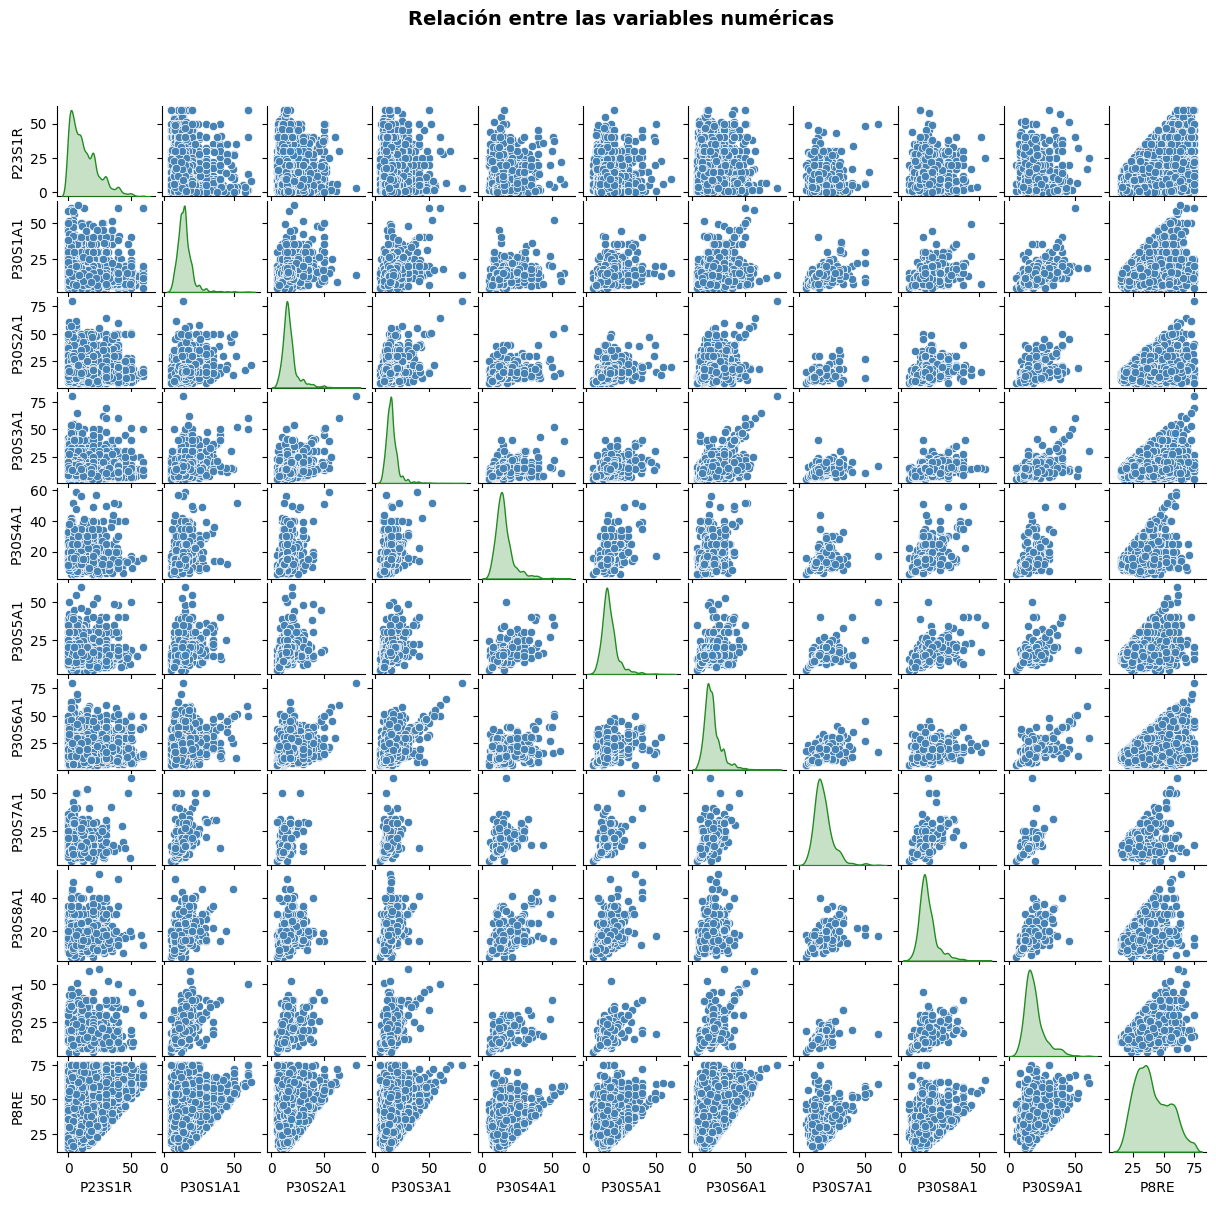

In [238]:
# Desactivar las advertencias
warnings.filterwarnings("ignore")

# Llamar a la función multiple_plot para visualización de variables numéricas
multiple_plot(1, habitantes_calle, numCols, None, 'scatterplot', 'Relación entre las variables numéricas', 30)

# Volver a activar las advertencias
warnings.filterwarnings("default")


In [240]:
# Se muestra la conversión de codificación a las etiquetas de cada variable
display(habitantes_calle.head(2))

,P1,P1S1,P2S1,P5,P10R,P11R,P12,P13,P16S1,P16S2,P16S3,P16S4,P16S5,P16S6,P16S7,P16S8,P16S9,P17,P17S1,P17S2,P17S3,P17S4,P17S5,P17S6,P17S7,P17S8,P17S9,P17S10,P18,P19,P20S1,P20S2,P20S3,P20S4,P20S5,P20S1A1,P20S2A1,P20S3A1,P20S4A1,P20S5A1,P21R,P22,P23S1R,P24,P25,P26S1,P26S2,P26S3,P26S4,P26S5,P26S6,P26_1,P26_2S1,P26_2S2,P26_2S3,P26_2S4,P26_2S5,P26_2S6,P26_2S7,P26_2S8,P27,P28R,P29,P30S1,P30S2,P30S3,P30S4,P30S5,P30S6,P30S7,P30S8,P30S9,P30S1A1,P30S2A1,P30S3A1,P30S4A1,P30S5A1,P30S6A1,P30S7A1,P30S8A1,P30S9A1,P30_1,P30_2,P31,P32,P32S1,P32S2,P32S3,P32S4,P32S5,P32S6,P32S7,P32S8,P33S1,P33S2,P33S3,P33S4,P33S5,P33S6,P33_1,P33_2S1,P33_2S2,P33_2S3,P33_2S4,P33_2S5,P34,COMPLETA,P8RE,P9E
0,Antioquia,Medellín,10,En una institución,Cédula de ciudadanía o Cédula de extranjería,En este municipio,En este municipio,"en un dormitorio transitorio? (hotel, paga dia...",Sin dificultad,Sin dificultad,"Sí, con mucha dificultad",Sin dificultad,Sin dificultad,"Sí, con alguna dificultad",Sin dificultad,"Sí, con mucha dificultad",Sin dificultad,Sí,No,No,No,No,No,No,No,No,Sí,No,Se autorecetó?,None,No,No,No,No,No,None,None,None,None,None,En este municipio,Conflictos o dificultades familiares,34.0,Soledad,Ninguno,No,No,Sí,Sí,No,No,De instituciones u organizaciones privadas?,No,Sí,Sí,No,No,No,No,Sí,Sí,Básica secundaria,Otra,No,Sí,No,No,Sí,No,No,No,No,NaN,8.0,NaN,NaN,8.0,NaN,NaN,NaN,NaN,"Alcohol? (Bebidas alcohólicas, chamber, etílico)",None,No,None,No,No,No,No,No,No,No,No,No,No,Sí,No,No,No,No,No,No,No,No,No,Heterosexual?,Completa,46.0,Hombre
1,Antioquia,Medellín,10,En una institución,Cédula de ciudadanía o Cédula de extranjería,En este municipio,En este municipio,en una institución?,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,No,None,None,None,None,None,None,None,None,None,None,None,None,No,No,No,No,No,None,None,None,None,None,En este municipio,Conflictos o dificultades familiares,20.0,Dificultades económicas,Ninguno,No,No,Sí,No,No,No,De instituciones oficiales?,No,Sí,Sí,Sí,Sí,Sí,Sí,Sí,Sí,"Media académica, media técnica o normalista",Otra,Sí,Sí,Sí,No,No,Sí,No,No,No,18.0,18.0,18.0,NaN,NaN,18.0,NaN,NaN,NaN,Marihuana?,None,Sí,No,No,No,No,No,No,No,Sí,No,No,No,No,No,No,No,No,No,No,No,No,No,Heterosexual?,Completa,58.0,Hombre


In [241]:
#Lista de variables categóricas
catCols = habitantes_calle.select_dtypes(include = ["object", 'category']).columns.tolist()

habitantes_calle[catCols].head(2)

,P1,P1S1,P2S1,P5,P10R,P11R,P12,P13,P16S1,P16S2,P16S3,P16S4,P16S5,P16S6,P16S7,P16S8,P16S9,P17,P17S1,P17S2,P17S3,P17S4,P17S5,P17S6,P17S7,P17S8,P17S9,P17S10,P18,P19,P20S1,P20S2,P20S3,P20S4,P20S5,P20S1A1,P20S2A1,P20S3A1,P20S4A1,P20S5A1,P21R,P22,P24,P25,P26S1,P26S2,P26S3,P26S4,P26S5,P26S6,P26_1,P26_2S1,P26_2S2,P26_2S3,P26_2S4,P26_2S5,P26_2S6,P26_2S7,P26_2S8,P27,P28R,P29,P30S1,P30S2,P30S3,P30S4,P30S5,P30S6,P30S7,P30S8,P30S9,P30_1,P30_2,P31,P32,P32S1,P32S2,P32S3,P32S4,P32S5,P32S6,P32S7,P32S8,P33S1,P33S2,P33S3,P33S4,P33S5,P33S6,P33_1,P33_2S1,P33_2S2,P33_2S3,P33_2S4,P33_2S5,P34,COMPLETA,P9E
0,Antioquia,Medellín,10,En una institución,Cédula de ciudadanía o Cédula de extranjería,En este municipio,En este municipio,"en un dormitorio transitorio? (hotel, paga dia...",Sin dificultad,Sin dificultad,"Sí, con mucha dificultad",Sin dificultad,Sin dificultad,"Sí, con alguna dificultad",Sin dificultad,"Sí, con mucha dificultad",Sin dificultad,Sí,No,No,No,No,No,No,No,No,Sí,No,Se autorecetó?,None,No,No,No,No,No,None,None,None,None,None,En este municipio,Conflictos o dificultades familiares,Soledad,Ninguno,No,No,Sí,Sí,No,No,De instituciones u organizaciones privadas?,No,Sí,Sí,No,No,No,No,Sí,Sí,Básica secundaria,Otra,No,Sí,No,No,Sí,No,No,No,No,"Alcohol? (Bebidas alcohólicas, chamber, etílico)",None,No,None,No,No,No,No,No,No,No,No,No,No,Sí,No,No,No,No,No,No,No,No,No,Heterosexual?,Completa,Hombre
1,Antioquia,Medellín,10,En una institución,Cédula de ciudadanía o Cédula de extranjería,En este municipio,En este municipio,en una institución?,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,No,None,None,None,None,None,None,None,None,None,None,None,None,No,No,No,No,No,None,None,None,None,None,En este municipio,Conflictos o dificultades familiares,Dificultades económicas,Ninguno,No,No,Sí,No,No,No,De instituciones oficiales?,No,Sí,Sí,Sí,Sí,Sí,Sí,Sí,Sí,"Media académica, media técnica o normalista",Otra,Sí,Sí,Sí,No,No,Sí,No,No,No,Marihuana?,None,Sí,No,No,No,No,No,No,No,Sí,No,No,No,No,No,No,No,No,No,No,No,No,No,Heterosexual?,Completa,Hombre


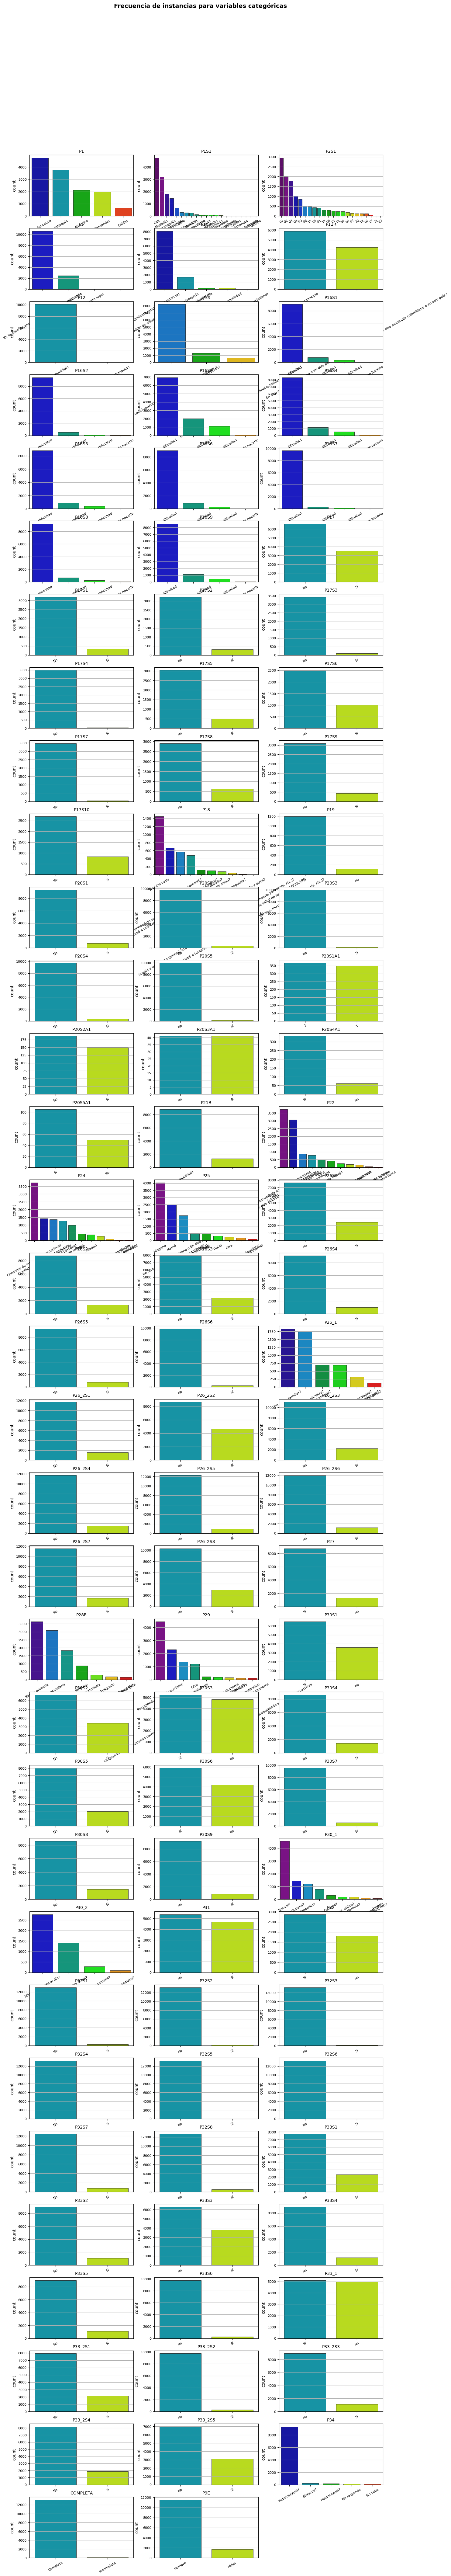

In [242]:
# Desactivar las advertencias
warnings.filterwarnings("ignore")

#Llamar a la función multiple_plot para visualización de frecuencia de instancias para variables categóricas
multiple_plot(3, habitantes_calle , catCols, None, 'countplot', 'Frecuencia de instancias para variables categóricas',30)

# Volver a activar las advertencias
warnings.filterwarnings("default")


In [243]:
#Segunda  columnas que no se emplearán
habitantes_calle.drop(['P12','P17S4','P17S7','P19','P20S3','P20S5','P32S1','P32S2','P32S3','P32S4','P32S5','P32S6','P32S7','P32S8'], axis='columns', inplace=True)

In [244]:
#Lista de variables categóricas
catCols = habitantes_calle.select_dtypes(include = ["object", 'category']).columns.tolist()

habitantes_calle[catCols].head(2)

,P1,P1S1,P2S1,P5,P10R,P11R,P13,P16S1,P16S2,P16S3,P16S4,P16S5,P16S6,P16S7,P16S8,P16S9,P17,P17S1,P17S2,P17S3,P17S5,P17S6,P17S8,P17S9,P17S10,P18,P20S1,P20S2,P20S4,P20S1A1,P20S2A1,P20S3A1,P20S4A1,P20S5A1,P21R,P22,P24,P25,P26S1,P26S2,P26S3,P26S4,P26S5,P26S6,P26_1,P26_2S1,P26_2S2,P26_2S3,P26_2S4,P26_2S5,P26_2S6,P26_2S7,P26_2S8,P27,P28R,P29,P30S1,P30S2,P30S3,P30S4,P30S5,P30S6,P30S7,P30S8,P30S9,P30_1,P30_2,P31,P32,P33S1,P33S2,P33S3,P33S4,P33S5,P33S6,P33_1,P33_2S1,P33_2S2,P33_2S3,P33_2S4,P33_2S5,P34,COMPLETA,P9E
0,Antioquia,Medellín,10,En una institución,Cédula de ciudadanía o Cédula de extranjería,En este municipio,"en un dormitorio transitorio? (hotel, paga dia...",Sin dificultad,Sin dificultad,"Sí, con mucha dificultad",Sin dificultad,Sin dificultad,"Sí, con alguna dificultad",Sin dificultad,"Sí, con mucha dificultad",Sin dificultad,Sí,No,No,No,No,No,No,Sí,No,Se autorecetó?,No,No,No,None,None,None,None,None,En este municipio,Conflictos o dificultades familiares,Soledad,Ninguno,No,No,Sí,Sí,No,No,De instituciones u organizaciones privadas?,No,Sí,Sí,No,No,No,No,Sí,Sí,Básica secundaria,Otra,No,Sí,No,No,Sí,No,No,No,No,"Alcohol? (Bebidas alcohólicas, chamber, etílico)",None,No,None,No,No,Sí,No,No,No,No,No,No,No,No,No,Heterosexual?,Completa,Hombre
1,Antioquia,Medellín,10,En una institución,Cédula de ciudadanía o Cédula de extranjería,En este municipio,en una institución?,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,No,None,None,None,None,None,None,None,None,None,No,No,No,None,None,None,None,None,En este municipio,Conflictos o dificultades familiares,Dificultades económicas,Ninguno,No,No,Sí,No,No,No,De instituciones oficiales?,No,Sí,Sí,Sí,Sí,Sí,Sí,Sí,Sí,"Media académica, media técnica o normalista",Otra,Sí,Sí,Sí,No,No,Sí,No,No,No,Marihuana?,None,Sí,No,No,No,No,No,No,No,No,No,No,No,No,No,Heterosexual?,Completa,Hombre


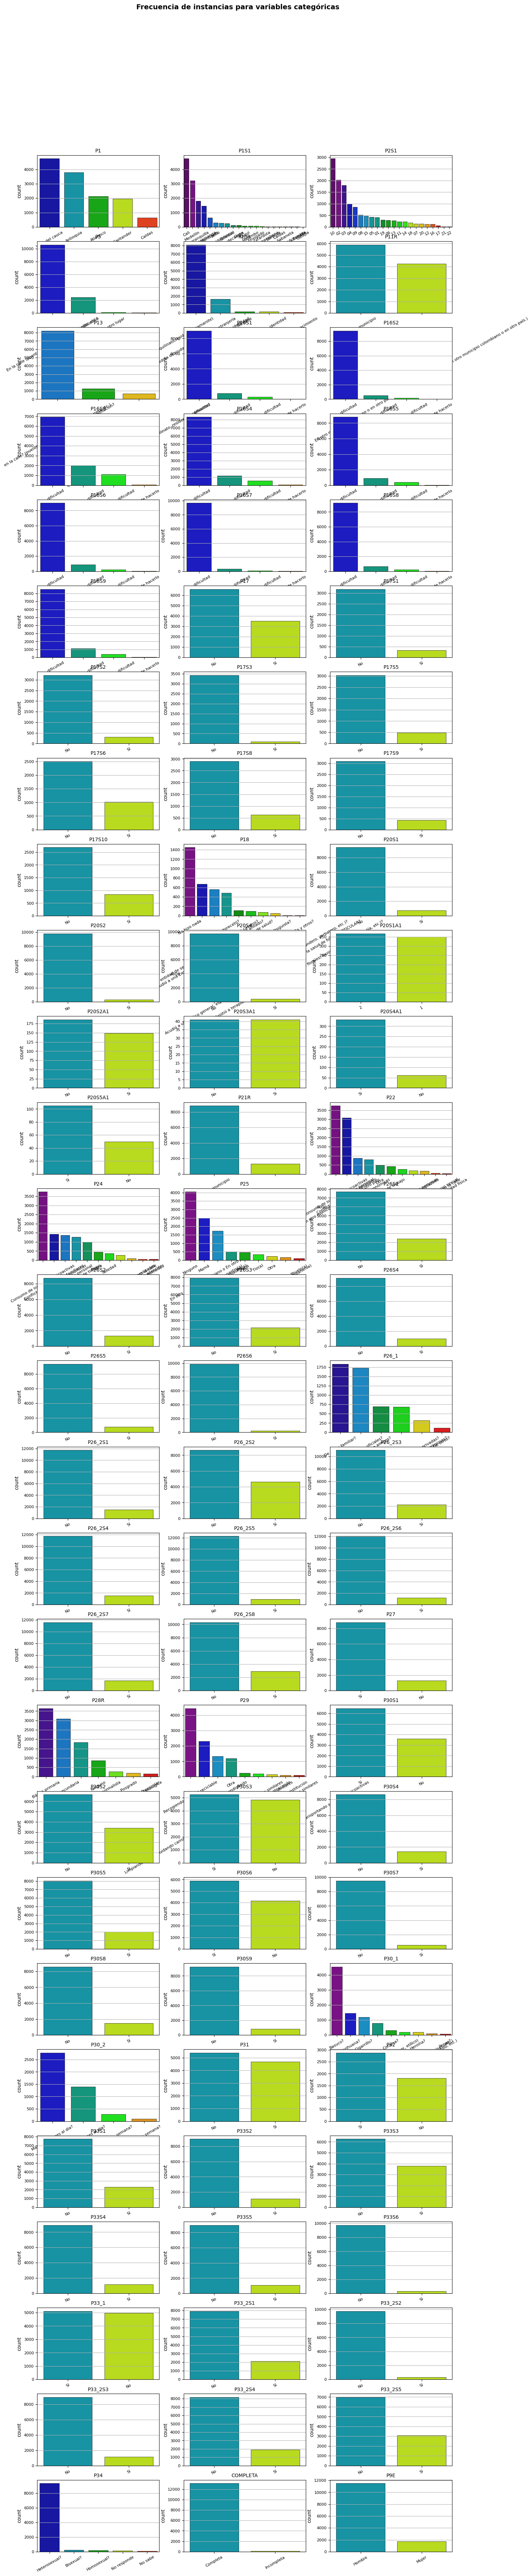

In [245]:
# Desactivar las advertencias
warnings.filterwarnings("ignore")

#Llamar a la función multiple_plot para visualización de frecuencia de instancias para variables categóricas
multiple_plot(3, habitantes_calle , catCols, None, 'countplot', 'Frecuencia de instancias para variables categóricas',30)

# Volver a activar las advertencias
warnings.filterwarnings("default")

In [246]:
#Se eliminan los registros cuyas entrevistas fueron incompletas
habitantes_calle_depurada = habitantes_calle[habitantes_calle['COMPLETA'] != 'Incompleta']

In [247]:
#Mostrar el dataset depurado finalmente
habitantes_calle_depurada

,P1,P1S1,P2S1,P5,P10R,P11R,P13,P16S1,P16S2,P16S3,P16S4,P16S5,P16S6,P16S7,P16S8,P16S9,P17,P17S1,P17S2,P17S3,P17S5,P17S6,P17S8,P17S9,P17S10,P18,P20S1,P20S2,P20S4,P20S1A1,P20S2A1,P20S3A1,P20S4A1,P20S5A1,P21R,P22,P23S1R,P24,P25,P26S1,P26S2,P26S3,P26S4,P26S5,P26S6,P26_1,P26_2S1,P26_2S2,P26_2S3,P26_2S4,P26_2S5,P26_2S6,P26_2S7,P26_2S8,P27,P28R,P29,P30S1,P30S2,P30S3,P30S4,P30S5,P30S6,P30S7,P30S8,P30S9,P30S1A1,P30S2A1,P30S3A1,P30S4A1,P30S5A1,P30S6A1,P30S7A1,P30S8A1,P30S9A1,P30_1,P30_2,P31,P32,P33S1,P33S2,P33S3,P33S4,P33S5,P33S6,P33_1,P33_2S1,P33_2S2,P33_2S3,P33_2S4,P33_2S5,P34,COMPLETA,P8RE,P9E
0,Antioquia,Medellín,10,En una institución,Cédula de ciudadanía o Cédula de extranjería,En este municipio,"en un dormitorio transitorio? (hotel, paga dia...",Sin dificultad,Sin dificultad,"Sí, con mucha dificultad",Sin dificultad,Sin dificultad,"Sí, con alguna dificultad",Sin dificultad,"Sí, con mucha dificultad",Sin dificultad,Sí,No,No,No,No,No,No,Sí,No,Se autorecetó?,No,No,No,None,None,None,None,None,En este municipio,Conflictos o dificultades familiares,34.0,Soledad,Ninguno,No,No,Sí,Sí,No,No,De instituciones u organizaciones privadas?,No,Sí,Sí,No,No,No,No,Sí,Sí,Básica secundaria,Otra,No,Sí,No,No,Sí,No,No,No,No,NaN,8.0,NaN,NaN,8.0,NaN,NaN,NaN,NaN,"Alcohol? (Bebidas alcohólicas, chamber, etílico)",None,No,None,No,No,Sí,No,No,No,No,No,No,No,No,No,Heterosexual?,Completa,46.0,Hombre
1,Antioquia,Medellín,10,En una institución,Cédula de ciudadanía o Cédula de extranjería,En este municipio,en una institución?,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,No,None,None,None,None,None,None,None,None,None,No,No,No,None,None,None,None,None,En este municipio,Conflictos o dificultades familiares,20.0,Dificultades económicas,Ninguno,No,No,Sí,No,No,No,De instituciones oficiales?,No,Sí,Sí,Sí,Sí,Sí,Sí,Sí,Sí,"Media académica, media técnica o normalista",Otra,Sí,Sí,Sí,No,No,Sí,No,No,No,18.0,18.0,18.0,NaN,NaN,18.0,NaN,NaN,NaN,Marihuana?,None,Sí,No,No,No,No,No,No,No,No,No,No,No,No,No,Heterosexual?,Completa,58.0,Hombre
2,Antioquia,Medellín,10,En una institución,Cédula de ciudadanía o Cédula de extranjería,En este municipio,en una institución?,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,"Sí, con alguna dificultad",Sin dificultad,Sin dificultad,"Sí, con alguna dificultad",Sin dificultad,Sí,No,No,No,No,No,No,No,Sí,Acudió a la entidad de seguridad social en sal...,No,No,No,None,None,None,None,None,En este municipio,Victima del conflicto armado o desplazado,23.0,Conflictos o dificultades familiares,"Pareja (esposoa, compañeroa)",No,No,Sí,No,No,No,De instituciones oficiales?,No,Sí,Sí,No,No,No,Sí,Sí,Sí,"Media académica, media técnica o normalista",Robando o atracando,No,No,No,No,No,No,No,Sí,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.0,NaN,Pepas?,None,Sí,Sí,Sí,Sí,Sí,Sí,Sí,No,Sí,Sí,No,Sí,Sí,Sí,Heterosexual?,Completa,37.0,Hombre
3,Antioquia,Medellín,10,En una institución,Cédula de ciudadanía o Cédula de extranjería,En este municipio,en una institución?,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,No,None,None,None,None,None,None,None,None,None,No,No,No,None,None,None,None,None,En este municipio,Consumo de sustancias psicoactivas,7.0,Por gusto personal,"Hermano(a), hermanastro(a)",Sí,Sí,Sí,No,No,No,De algún familiar?,Sí,Sí,Sí,Sí,No,Sí,Sí,Sí,Sí,Básica primaria,Ejerciendo la prostitución,Sí,No,No,Sí,No,Sí,No,Sí,Sí,7.0,NaN,NaN,9.0,NaN,9.0,NaN,9.0,9.0,Basuco?,Más de 10 veces al día?,Sí,No,No,No,No,No,No,No,No,No,No,No,No,No,Heterosexual?,Completa,28.0,Mujer
4,Antioquia,Medellín,10,En una institución,Cédula de ciudadanía o Cédula de extranjería,En este municipio,en una institución?,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,Sin dificultad,No,None,None,None,None,None,None,None,None,None,No,No,No,None,None,None,None,None,En e

In [248]:
#Mostrar valores nulos por columna
print("Valores nulos por columna:")
print(habitantes_calle.isnull().sum())

print("\nValores únicos por columna:")
for column in habitantes_calle.select_dtypes(include=['object']).columns:
  print(f"{column}: {habitantes_calle[column].unique()}\n=========================")

Valores nulos por columna:
P1             0
P1S1           0
P2S1         692
P5             0
P10R        3096
            ... 
P33_2S5     3183
P34         3277
COMPLETA       0
P8RE           0
P9E            0
Length: 95, dtype: int64

Valores únicos por columna:
P1: ['Antioquia' 'Valle del cauca' 'Santander' 'Caldas' 'Atlantico']
P1S1: ['Medellín' 'Cali' 'Bucaramanga' 'Manizales' 'Bello' 'Floridablanca'
 'Barranquilla' 'Envigado' 'Itagui' 'Barbosa' 'Piedecuesta' 'Girardota'
 'La Estrella' 'Giron' 'Copacabana' 'Sabaneta' 'Caldas' 'Soledad'
 'Puerto Colombia' 'Malambo' 'Galapa']
P2S1: ['10' '09' '03' '02' '15' '11' '19' '04' '20' '08' '01' '05' '12' '06'
 '07' '18' '13' '14' '16' '21' '17' '22' None]
P5: ['En una institución'
 'En la calle (puente, andén, parque, alcantarilla, etc.)' 'En otro lugar'
 'En un dormitorio transitorio (hotel, paga diario,inquilinato,residencia, camarote)']
P10R: ['Cédula de ciudadanía o Cédula de extranjería'
 'No tiene documento de identidad' None 'Tarj

In [249]:
#Verificación de registros duplicados
habitantes_calle_depurada.loc[habitantes_calle_depurada.duplicated()]

,P1,P1S1,P2S1,P5,P10R,P11R,P13,P16S1,P16S2,P16S3,P16S4,P16S5,P16S6,P16S7,P16S8,P16S9,P17,P17S1,P17S2,P17S3,P17S5,P17S6,P17S8,P17S9,P17S10,P18,P20S1,P20S2,P20S4,P20S1A1,P20S2A1,P20S3A1,P20S4A1,P20S5A1,P21R,P22,P23S1R,P24,P25,P26S1,P26S2,P26S3,P26S4,P26S5,P26S6,P26_1,P26_2S1,P26_2S2,P26_2S3,P26_2S4,P26_2S5,P26_2S6,P26_2S7,P26_2S8,P27,P28R,P29,P30S1,P30S2,P30S3,P30S4,P30S5,P30S6,P30S7,P30S8,P30S9,P30S1A1,P30S2A1,P30S3A1,P30S4A1,P30S5A1,P30S6A1,P30S7A1,P30S8A1,P30S9A1,P30_1,P30_2,P31,P32,P33S1,P33S2,P33S3,P33S4,P33S5,P33S6,P33_1,P33_2S1,P33_2S2,P33_2S3,P33_2S4,P33_2S5,P34,COMPLETA,P8RE,P9E
168,Valle del cauca,Cali,03,"En la calle (puente, andén, parque, alcantaril...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,No,No,No,No,No,No,No,No,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Completa,40.0,Hombre
243,Valle del cauca,Cali,09,"En la calle (puente, andén, parque, alcantaril...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,No,No,No,No,No,No,No,No,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Completa,50.0,Hombre
295,Valle del cauca,Cali,03,"En la calle (puente, andén, parque, alcantaril...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,No,No,No,No,No,No,No,No,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Completa,30.0,Hombre
300,Valle del cauca,Cali,09,"En la calle (puente, andén, parque, alcantaril...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,No,No,No,No,No,No,No,No,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Completa,60.0,Hombre
324,Valle del cauca,Cali,03,"En la calle (puente, andén, parque, alcantaril...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,No,No,No,No,No,No,No,No,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,Completa,32.0,Hombre
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13130,Atlantico,Barranquilla,02,"En la calle (puente, andén, parque, alcantaril...",None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,NaN,None,None,None,None,None,None,None,None,None,No,No,No,No,No,No,No,No,None,None,None,None,None,None,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None,None,None,None,None,None,

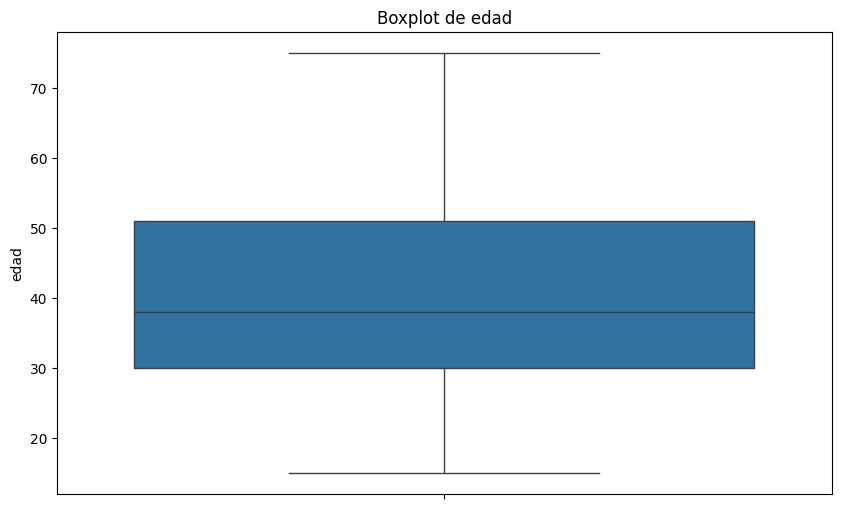

In [255]:
# Crear el boxplot para una variable específica, por ejemplo, P8RE (edad)'
plt.figure(figsize=(10, 6))
sns.boxplot(y=habitantes_calle_depurada['P8RE'])
plt.title('Boxplot de edad')
plt.ylabel('edad')
plt.show()

In [250]:
# Distribución de cada variable categórica en el conjunto de datos

for col in catCols:
    print("="*5 + f" {col} " + "="*20)
    print(habitantes_calle[col].value_counts())
    print()

===== P1 ====================
P1
Valle del cauca    4749
Antioquia          3788
Atlantico          2120
Santander          1960
Caldas              635
Name: count, dtype: int64

===== P1S1 ====================
P1S1
Cali               4749
Medellín           3214
Barranquilla       1795
Bucaramanga        1448
Manizales           635
Bello               304
Floridablanca       276
Soledad             236
Piedecuesta         127
Giron               109
Itagui               76
Malambo              75
Envigado             63
Girardota            36
Copacabana           28
Barbosa              26
Caldas               17
Sabaneta             15
Puerto Colombia      13
La Estrella           9
Galapa                1
Name: count, dtype: int64

===== P2S1 ====================
P2S1
10    2948
02    2025
03    1797
04    1005
09     854
08     516
15     477
05     433
01     409
19     304
06     290
13     268
11     226
14     225
18     180
07     138
20     129
12     127
16     123
17    

In [251]:
# Identificación de valores nulos para las variables numéricas
for col in habitantes_calle[numCols]:
    print (col, np.sum(pd.isnull(habitantes_calle[col])))

P23S1R 3145
P30S1A1 6775
P30S2A1 9842
P30S3A1 8009
P30S4A1 11801
P30S5A1 11225
P30S6A1 7351
P30S7A1 12710
P30S8A1 11761
P30S9A1 12415
P8RE 0


In [252]:
# Identificación de valores nulos para las variables categóricas
for col in habitantes_calle[catCols]:
    print (col, np.sum(pd.isnull(habitantes_calle[col])))

P1 0
P1S1 0
P2S1 692
P5 0
P10R 3096
P11R 3101
P13 3104
P16S1 3116
P16S2 3118
P16S3 3118
P16S4 3119
P16S5 3119
P16S6 3120
P16S7 3121
P16S8 3121
P16S9 3122
P17 3124
P17S1 9726
P17S2 9726
P17S3 9726
P17S5 9726
P17S6 9726
P17S8 9726
P17S9 9726
P17S10 9726
P18 9727
P20S1 3125
P20S2 3125
P20S4 3125
P20S1A1 12535
P20S2A1 12917
P20S3A1 13170
P20S4A1 12859
P20S5A1 13097
P21R 3130
P22 3137
P24 3146
P25 3147
P26S1 3150
P26S2 3150
P26S3 3150
P26S4 3150
P26S5 3150
P26S6 3150
P26_1 7862
P26_2S1 0
P26_2S2 0
P26_2S3 0
P26_2S4 0
P26_2S5 0
P26_2S6 0
P26_2S7 0
P26_2S8 0
P27 3169
P28R 3171
P29 3172
P30S1 3176
P30S2 3176
P30S3 3176
P30S4 3176
P30S5 3176
P30S6 3176
P30S7 3177
P30S8 3177
P30S9 3177
P30_1 4368
P30_2 8699
P31 3181
P32 8571
P33S1 3183
P33S2 3183
P33S3 3183
P33S4 3183
P33S5 3183
P33S6 3183
P33_1 3182
P33_2S1 3183
P33_2S2 3183
P33_2S3 3183
P33_2S4 3183
P33_2S5 3183
P34 3277
COMPLETA 0
P9E 0
